In [34]:
#!pip install pycaret

In [87]:
# General utilities
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Setting display options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = 90

# Sklearn utilities and models
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Ensemble models
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Optuna for hyperparameter optimization
import optuna

# Seaborn settings
sns.set_style('darkgrid')

1. Cleaning
2. Feature Engineering
3. Feature Transformations
4. Encoding
5. Scaling
6. Target Transformations
7. Model Selection
8. Hyperparameter Opitmization
9. Ensembling
10. Feature Selection

credit to: https://www.youtube.com/watch?v=zwYHloLXH0c&t=2376s

In [36]:
train0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/HousingPricePrediction/Data/Kaggle_Data/house-prices-advanced-regression-techniques/train.csv')
test0 = pd.read_csv('/Users/merlesteffen/Documents/GitHub/HousingPricePrediction/Data/Kaggle_Data/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/Users/merlesteffen/Documents/GitHub/HousingPricePrediction/Data/Kaggle_Data/house-prices-advanced-regression-techniques/sample_submission.csv')

# Combine Train and Test

In [37]:
target= train0['SalePrice']
test_id = test0['Id']
train1 = train0.drop(columns=['SalePrice', 'Id'])
test1 = test0.drop(columns=['Id'])
data1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Un

# Cleaning

In [38]:
data2 = data1.copy()

## Ensure Proper Data Types

In [39]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

## Categorical Missing Values

In [40]:
# Impute using constant value
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    data2[column] = data2[column].fillna('None')


# Impute using column mode
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [41]:
# Get categorical columns with at least one missing value
data2.select_dtypes('object').loc[:, data2.isna().sum()>0].columns

Index([], dtype='object')

In [42]:
data3 = data2.copy()

## Numeric Missing Values

In [43]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [44]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    data3 = knn_impute(data3, column)

In [45]:
data4=data3.copy()

# Feature Engineering

In [46]:
data4["SqFtPerRoom"] = data4["GrLivArea"] / (data4["TotRmsAbvGrd"] +
                                                       data4["FullBath"] +
                                                       data4["HalfBath"] +
                                                       data4["KitchenAbvGr"])

data4['Total_Home_Quality'] = data4['OverallQual'] + data4['OverallCond']

data4['Total_Bathrooms'] = (data4['FullBath'] + (0.5 * data4['HalfBath']) +
                               data4['BsmtFullBath'] + (0.5 * data4['BsmtHalfBath']))

data4["HighQualSF"] = data4["1stFlrSF"] + data4["2ndFlrSF"]

In [47]:
data5 = data4.copy()

# Feature Transformations

## Log Transform for Skewed Features

In [48]:
skew_df = pd.DataFrame(data5.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data5[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [49]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    data5[column] = np.log1p(data5[column])

## Cosine Transform for Cyclical Features

In [50]:
data5['MoSold'] = (-np.cos(0.5236 * data5['MoSold']))

In [51]:
data6 = data5.copy()

# Encoding Categorical

In [52]:
data6 = pd.get_dummies(data6)
data7 = data6.copy()

In [53]:
data7

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SqFtPerRoom,Total_Home_Quality,Total_Bathrooms,HighQualSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functio

# Scaling

In [54]:
scaler = StandardScaler()
scaler.fit(data7)

data7 = pd.DataFrame(scaler.transform(data7), index=data7.index, columns=data7.columns)

In [55]:
data8 = data7.copy()

# Target Transformation

/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_12033/2409864084.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=scipy.stats.norm)
/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_12033/2409864084.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

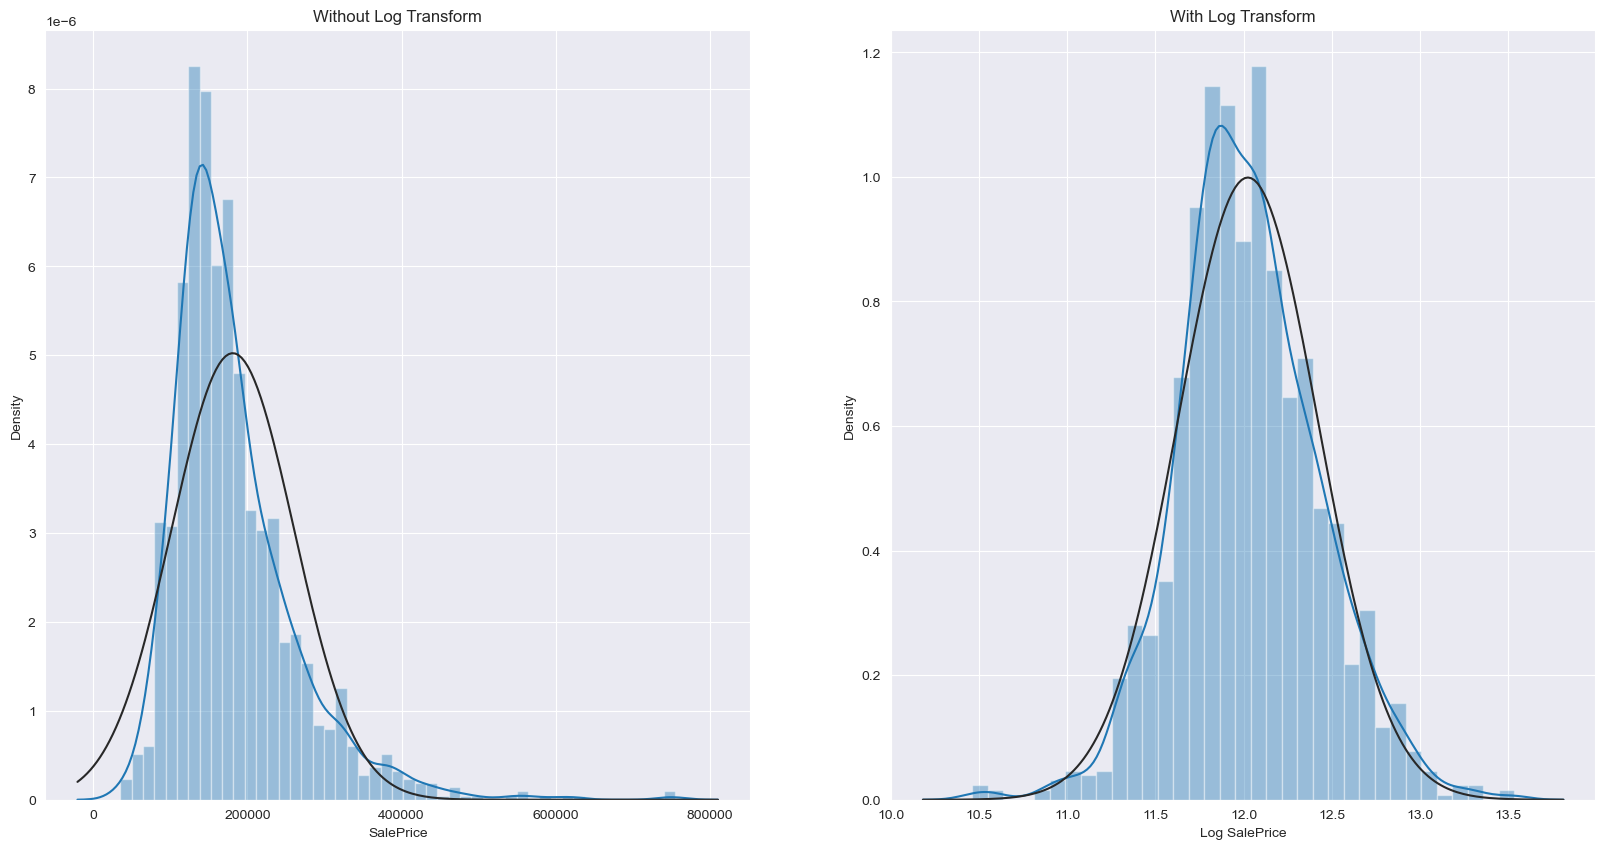

In [56]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("With Log Transform")

plt.show()

In [57]:
log_target = np.log(target)

# Split Data

In [58]:
train_final = data8.loc[:train0.index.max(), :].copy()
test_final = data8.loc[train0.index.max() + 1:, :].reset_index(drop=True).copy()

# Model Selection

In [59]:
#_ = setup(data=pd.concat([train_final, log_target], axis=1), target='SalePrice')

In [60]:
#compare_models()

Best models:
- CatBoost Regressor
- Bayesian Ridge
- Gradient Boosting Regressor
- Orthogonal Matching Pursuit
- Light Gradient Boosting Machine
- Extra Trees Regressor
- Random Forest Regressor

# Hyper Parameter Tuning

In [65]:
kf = KFold(n_splits=10)
n_jobs = max(1, os.cpu_count() - 1)

In [88]:
def catboost_objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    depth = trial.suggest_int('depth', 4, 10)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-4, 10, log=True)
    iterations = trial.suggest_int('iterations', 1000, 7000)
    eval_metric = 'RMSE'  # This is constant based on your initial params
    early_stopping_rounds = trial.suggest_int('early_stopping_rounds', 50, 300)
    random_seed = trial.suggest_int('random_seed', 1, 100)

    params = {
        'iterations': iterations,
        'learning_rate': learning_rate,
        'depth': depth,
        'l2_leaf_reg': l2_leaf_reg,
        'eval_metric': eval_metric,
        'early_stopping_rounds': early_stopping_rounds,
        'random_seed': random_seed,
        'verbose': 0
    }
    
    model = CatBoostRegressor(**params)
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(catboost_objective, n_trials=100, n_jobs=n_jobs)

[I 2023-10-06 17:38:54,732] A new study created in memory with name: no-name-7605bdb3-c58b-47f2-961e-ee45886ee9f4
[I 2023-10-06 17:42:43,557] Trial 10 finished with value: 1.1368091597940915 and parameters: {'learning_rate': 0.2510525719547449, 'depth': 7, 'l2_leaf_reg': 0.0007665664055954895, 'iterations': 1725, 'early_stopping_rounds': 278, 'random_seed': 36}. Best is trial 10 with value: 1.1368091597940915.
[I 2023-10-06 17:42:55,608] Trial 3 finished with value: 1.1274555316250447 and parameters: {'learning_rate': 0.12781317303324277, 'depth': 7, 'l2_leaf_reg': 0.0007249084532243048, 'iterations': 1807, 'early_stopping_rounds': 213, 'random_seed': 23}. Best is trial 3 with value: 1.1274555316250447.
[I 2023-10-06 17:43:50,085] Trial 8 finished with value: 1.1328776568875976 and parameters: {'learning_rate': 0.2727491325144243, 'depth': 5, 'l2_leaf_reg': 0.6432173646539289, 'iterations': 5519, 'early_stopping_rounds': 157, 'random_seed': 47}. Best is trial 3 with value: 1.1274555316

In [ ]:
study.best_params

In [69]:
def br_objective(trial):
    n_iter = trial.suggest_int('n_iter', 50, 600)
    tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
    alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
    alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 10.0)
    lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 10.0)
    lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 10.0)
    
    model = BayesianRidge(
        n_iter=n_iter,
        tol=tol,
        alpha_1=alpha_1,
        alpha_2=alpha_2,
        lambda_1=lambda_1,
        lambda_2=lambda_2
    )
    
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)

In [70]:
study = optuna.create_study(direction='minimize')
study.optimize(br_objective, n_trials=100, n_jobs=n_jobs)

[I 2023-10-06 16:54:33,685] A new study created in memory with name: no-name-29a24e32-f08c-44a1-b3a0-8c93cf11f41c
/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_12033/1881033542.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_12033/1881033542.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
/var/folders/7h/lk9jxn256x10l_m01pz7khdw0000gn/T/ipykernel_12033/1881033542.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://g

In [71]:
study.best_params

{'n_iter': 552,
 'tol': 0.0009506602711097602,
 'alpha_1': 3.36583905417042e-07,
 'alpha_2': 9.92104470558846,
 'lambda_1': 2.539813947198074e-08,
 'lambda_2': 2.1580847626252092e-05}

In [72]:
def gbr_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    
    model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)


In [73]:
study = optuna.create_study(direction='minimize')
study.optimize(gbr_objective, n_trials=100, n_jobs=n_jobs)

[I 2023-10-06 17:04:05,598] A new study created in memory with name: no-name-e90eef72-00d3-406d-9df6-a5ed0f11d0be
[I 2023-10-06 17:04:20,057] Trial 0 finished with value: 1.1370777986358336 and parameters: {'n_estimators': 155, 'learning_rate': 0.04255416231879547, 'max_depth': 3}. Best is trial 0 with value: 1.1370777986358336.
[I 2023-10-06 17:04:21,439] Trial 1 finished with value: 1.131545344569472 and parameters: {'n_estimators': 169, 'learning_rate': 0.06920319824182868, 'max_depth': 3}. Best is trial 1 with value: 1.131545344569472.
[I 2023-10-06 17:04:25,476] Trial 4 finished with value: 1.1378274065514906 and parameters: {'n_estimators': 107, 'learning_rate': 0.061048498153525914, 'max_depth': 6}. Best is trial 1 with value: 1.131545344569472.
[I 2023-10-06 17:04:30,896] Trial 11 finished with value: 1.1420353685690645 and parameters: {'n_estimators': 92, 'learning_rate': 0.2572508751561062, 'max_depth': 4}. Best is trial 1 with value: 1.131545344569472.
[I 2023-10-06 17:04:32

In [74]:
study.best_params

{'n_estimators': 272, 'learning_rate': 0.1558287572164038, 'max_depth': 2}

In [75]:
def omp_objective(trial):
    n_nonzero_coefs = trial.suggest_int('n_nonzero_coefs', 1, train_final.shape[1])

    model = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(train_final, log_target)

    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))

    return np.mean(cv_scores)


In [76]:
study = optuna.create_study(direction='minimize')
study.optimize(omp_objective, n_trials=100, n_jobs=n_jobs)

[I 2023-10-06 17:08:11,316] A new study created in memory with name: no-name-c02a7843-8fbd-405c-9c40-76d72294ac2c
/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_omp.py:780: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(
/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_omp.py:780: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(
/Users/merlesteffen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_omp.py:780: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  coef_, self.n_iter_ = orthogonal_mp_gram(
/Users/mer

In [77]:
study.best_params

{'n_nonzero_coefs': 70}

In [78]:
def lightgbm_objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    num_leaves = trial.suggest_int('num_leaves', 30, 150)
    max_depth = trial.suggest_int('max_depth', 4, 10)
    
    model = LGBMRegressor(learning_rate=learning_rate, num_leaves=num_leaves, max_depth=max_depth)
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)


In [79]:
study = optuna.create_study(direction='minimize')
study.optimize(lightgbm_objective, n_trials=100, n_jobs=n_jobs)

[I 2023-10-06 17:13:55,106] A new study created in memory with name: no-name-2fd703ed-0f05-4040-a3ed-68efe0c50d0e
[I 2023-10-06 17:15:24,726] Trial 6 finished with value: 1.1357339950070462 and parameters: {'learning_rate': 0.15299356355365945, 'num_leaves': 42, 'max_depth': 5}. Best is trial 6 with value: 1.1357339950070462.
[I 2023-10-06 17:15:41,537] Trial 8 finished with value: 1.1444680227209 and parameters: {'learning_rate': 0.2999481029417599, 'num_leaves': 77, 'max_depth': 6}. Best is trial 6 with value: 1.1357339950070462.
[I 2023-10-06 17:15:57,608] Trial 0 finished with value: 1.1373989648717118 and parameters: {'learning_rate': 0.09810952645985267, 'num_leaves': 107, 'max_depth': 6}. Best is trial 6 with value: 1.1357339950070462.
[I 2023-10-06 17:16:00,405] Trial 1 finished with value: 1.1403571291327297 and parameters: {'learning_rate': 0.18891046747813037, 'num_leaves': 88, 'max_depth': 7}. Best is trial 6 with value: 1.1357339950070462.
[I 2023-10-06 17:16:15,350] Trial

In [80]:
study.best_params

{'learning_rate': 0.13140764859309503, 'num_leaves': 50, 'max_depth': 5}

In [81]:
def extratrees_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 4, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    model = ExtraTreesRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)


In [82]:
study = optuna.create_study(direction='minimize')
study.optimize(extratrees_objective, n_trials=100, n_jobs=n_jobs)

[I 2023-10-06 17:29:15,917] A new study created in memory with name: no-name-e1c1de77-1b6c-49b9-ab16-4ddc9fe0d28c
[I 2023-10-06 17:29:26,052] Trial 0 finished with value: 1.1496463147635931 and parameters: {'n_estimators': 75, 'max_depth': 9, 'min_samples_split': 6}. Best is trial 0 with value: 1.1496463147635931.
[I 2023-10-06 17:29:26,120] Trial 4 finished with value: 1.194324064690797 and parameters: {'n_estimators': 167, 'max_depth': 4, 'min_samples_split': 5}. Best is trial 0 with value: 1.1496463147635931.
[I 2023-10-06 17:29:27,524] Trial 3 finished with value: 1.1477523212662684 and parameters: {'n_estimators': 83, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 3 with value: 1.1477523212662684.
[I 2023-10-06 17:29:29,416] Trial 8 finished with value: 1.147166056285287 and parameters: {'n_estimators': 92, 'max_depth': 10, 'min_samples_split': 6}. Best is trial 8 with value: 1.147166056285287.
[I 2023-10-06 17:29:30,294] Trial 9 finished with value: 1.1776387673997326 a

In [83]:
study.best_params

{'n_estimators': 164, 'max_depth': 10, 'min_samples_split': 9}

In [84]:
def rforest_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 4, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(train_final, log_target)
    
    cv_scores = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_scores)


In [85]:
study = optuna.create_study(direction='minimize')
study.optimize(rforest_objective, n_trials=100, n_jobs=n_jobs)

[I 2023-10-06 17:32:37,859] A new study created in memory with name: no-name-0f4d9c13-291b-4b9d-a033-0bf433c1e64c
[I 2023-10-06 17:32:46,783] Trial 4 finished with value: 1.187372164796917 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_split': 8}. Best is trial 4 with value: 1.187372164796917.
[I 2023-10-06 17:32:48,648] Trial 2 finished with value: 1.1875160990475906 and parameters: {'n_estimators': 106, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 4 with value: 1.187372164796917.
[I 2023-10-06 17:32:55,905] Trial 1 finished with value: 1.1623358551292515 and parameters: {'n_estimators': 123, 'max_depth': 6, 'min_samples_split': 3}. Best is trial 1 with value: 1.1623358551292515.
[I 2023-10-06 17:33:00,199] Trial 11 finished with value: 1.1727989478465104 and parameters: {'n_estimators': 106, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 1 with value: 1.1623358551292515.
[I 2023-10-06 17:33:01,365] Trial 12 finished with value: 1.1546180932054875 

In [86]:
study.best_params

{'n_estimators': 275, 'max_depth': 10, 'min_samples_split': 6}

# Bagging

In [46]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.02,
    'depth': 5,
    'l2_leaf_reg': 0.000115,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}


br_params = {
    'n_iter': 552,
    'tol': 0.00095066,
    'alpha_1': 0.00000034,
    'alpha_2': 9.92104471,
    'lambda_1': 0.00000003,
    'lambda_2': 0.00002158
}

omp_params= {
    'n_nonzero_coefs': 70
}


gbr_params = {
    'n_estimators': 272,
    'learning_rate': 0.1558287572164038,
    'max_depth': 2
}

lightgbm_params = {
    'learning_rate': 0.13140764859309503,
    'num_leaves': 50,
    'max_depth': 5
}

ridge_params = {
    'alpha': 631.1412445239156
}

et_params= {
    'n_estimators': 164,
    'max_depth': 10,
    'min_samples_split': 9
}

rf_params = {
    'n_estimators': 275,
    'max_depth': 10,
    'min_samples_split': 6
}

In [47]:
models = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "br": BayesianRidge(**br_params),
    "lightgbm": LGBMRegressor(**lightgbm_params),
    "ridge": Ridge(**ridge_params),
    "omp": OrthogonalMatchingPursuit()
}

In [ ]:
models_2 = {
    "catboost": CatBoostRegressor(**catboost_params, verbose=0),
    "br": BayesianRidge(**br_params),
    "gbr": GradientBoostingRegressor(**gbr_params),
    "omp": OrthogonalMatchingPursuit(**omp_params),
    "lightgbm": LGBMRegressor(**lightgbm_params),
    "extratrees": ExtraTreesRegressor(**et_params),
    "rforest": RandomForestRegressor(**rf_params)
    
}

In [48]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + " trained.")

catboost trained.
br trained.
lightgbm trained.
ridge trained.
omp trained.


## Evaluate

In [49]:
results = {}

kf = KFold(n_splits=10)

for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

In [ ]:
results2 = {}

kf = KFold(n_splits=10)

for name, model in models_2.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results2[name] = result

In [50]:
results

{'catboost': array([1.12021972, 1.09682891, 1.10665708, 1.15785186, 1.15402235,
        1.10855739, 1.12304013, 1.10114545, 1.12197375, 1.13346992]),
 'br': array([1.1229799 , 1.10427212, 1.12404146, 1.16762184, 1.15415735,
        1.12781251, 1.12555921, 1.10230858, 1.18559018, 1.13275085]),
 'lightgbm': array([1.12927898, 1.10483239, 1.11283492, 1.16835401, 1.16695822,
        1.11358874, 1.12790915, 1.10885958, 1.14491762, 1.14087521]),
 'ridge': array([1.12286405, 1.10508985, 1.12400041, 1.16917643, 1.15682945,
        1.12098928, 1.12636149, 1.10344533, 1.17998562, 1.13329896]),
 'omp': array([1.13223077, 1.09725882, 1.12930056, 1.18311203, 1.15621703,
        1.15856033, 1.12668149, 1.11595193, 1.17872568, 1.15502105])}

In [ ]:
results2

In [51]:
for name, result in results.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

----------
catboost
1.1223766557897308
0.01982368408684816
----------
br
1.1347093974007272
0.025324022847942745
----------
lightgbm
1.1318408821014765
0.02189302035431408
----------
ridge
1.134204086720898
0.024686693336829973
----------
omp
1.1433059679202842
0.02615240047297117


In [ ]:
for name, result in results2.items():
    print("----------\n" + name)
    print(np.mean(result))
    print(np.std(result))

# Combine Predictions

In [52]:
final_predictions = (
    0.4 * np.exp(models['catboost'].predict(test_final)) +
    0.2 * np.exp(models['br'].predict(test_final)) +
    0.2 * np.exp(models['lightgbm'].predict(test_final)) +
    0.1 * np.exp(models['ridge'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final))
)

In [ ]:
final_predictions2 = (
    0.3 * np.exp(models['catboost'].predict(test_final)) +
    0.2 * np.exp(models['br'].predict(test_final)) +
    0.1 * np.exp(models['gbr'].predict(test_final)) +
    0.1 * np.exp(models['omp'].predict(test_final)) +
    0.1 * np.exp(models['lightgbm'].predict(test_final)) +
    0.1 * np.exp(models['extratrees'].predict(test_final)) +
    0.1 * np.exp(models['rforest'].predict(test_final))
    
)

In [53]:
final_predictions

array([123674.940137  , 158011.45764141, 180639.17791899, ...,
       160518.5698858 , 116585.16613145, 218464.70805733])

# Submission

In [54]:
submission = pd.concat([test_id, pd.Series(final_predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,123674.940137
1,1462,158011.457641
2,1463,180639.177919
3,1464,192888.266221
4,1465,190972.207191
...,...,...
1454,2915,85995.797366
1455,2916,81456.837877
1456,2917,160518.569886
1457,2918,116585.166131


In [55]:
submission.to_csv('./submission.csv', index=False, header=True)